In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

https://keras.io/api/datasets/mnist/

In [2]:
# Loading the MNIST data from keras datasets
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape) # 60000 images and each image has a dimension of 28x28

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- Training data = 60000 images
- Test data = 10000 images
- Image dimension -> 28 x 28
- Grayscale image -> 1 channel

In [5]:
# Print the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


9


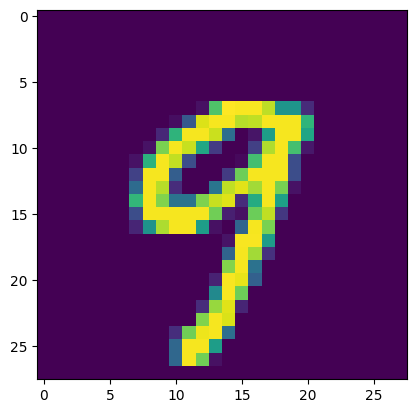

In [19]:
# Display the image
plt.imshow(X_train[45])
plt.show

# Print the corresponding label
print(Y_train[45])

labels

In [17]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [18]:
# Unique values

print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset. If not, we have to resize all the images to a common dimension

In [20]:
# Scaling Part
X_train = X_train/255
X_test = X_test/255

# 0 / 255 = 0 min value
# 255 / 255 = 1 max value

In [22]:
print(X_train[10]) # now values are between 0 and 1 before they were between 0 - 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

NN

In [25]:
# Layers of the NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #single dimension
    keras.layers.Dense(50, activation='relu'), # 50 Neurons
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') # Total number of numbers is 10 (0,1,2,3,4,5,6,7,8,9)
])

In [26]:
# Compiling the NN

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [28]:
# training the NN
model.fit(X_train,Y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8559 - loss: 0.5057
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9567 - loss: 0.1437
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9699 - loss: 0.1030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0816
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0659
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9833 - loss: 0.0552
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0466
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0410
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0356
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0324


Training data accuracy: 0.9898

**Accuracy on test data**

In [30]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1460
0.9702000021934509
0.1251073181629181


Test data accuracy: 0.97

In [31]:
print(X_test.shape)

(10000, 28, 28)


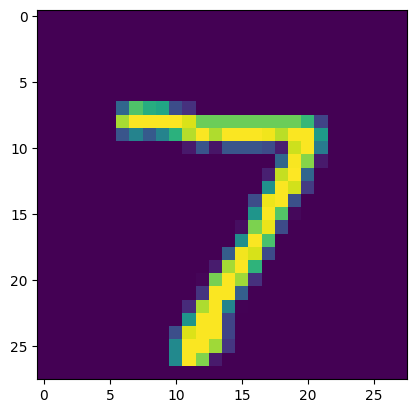

In [32]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [33]:
print(Y_test[0])

7


In [34]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [35]:
print(y_pred.shape)

(10000, 10)


In [38]:
print(y_pred[0]) # different from ML model in terms of the output. It does not give the label. 10 labels: probability of being 1 is the first one, probability of being 2 is the second one, ...

[1.56998354e-07 1.16553565e-04 4.18455899e-01 6.89222991e-01
 5.22392440e-09 1.52259381e-05 1.67618523e-17 1.00000000e+00
 6.50433451e-03 5.70867658e-01]


In [39]:
# Convert the prediction probabilities to class labels

label_for_first = np.argmax(y_pred[0])
print(label_for_first)

7


In [41]:
label_for_second = np.argmax(y_pred[1])
print(label_for_second)

2


In [42]:
# Converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 4, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

- Y_test -> True Labels
- y_pred_labels -> Predicted Labels

In [43]:
# Confusion Matrix

conf_mat=confusion_matrix(Y_test,y_pred_labels)

In [44]:
print(conf_mat)

tf.Tensor(
[[ 959    0    1    3    4    0    2    1    1    9]
 [   0 1124    2    3    1    0    0    0    5    0]
 [   2    1  996    8    1    0    3   13    8    0]
 [   0    0    1  985    2    2    0   10    5    5]
 [   0    1    2    1  970    0    2    1    2    3]
 [   3    0    0   30    5  831    4    2   12    5]
 [   5    2    1    1    6    5  934    1    3    0]
 [   1    4   10    1    3    0    1  994    1   13]
 [   5    0    5   13    3    1    1    7  934    5]
 [   2    2    1    5   19    1    1    3    1  974]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

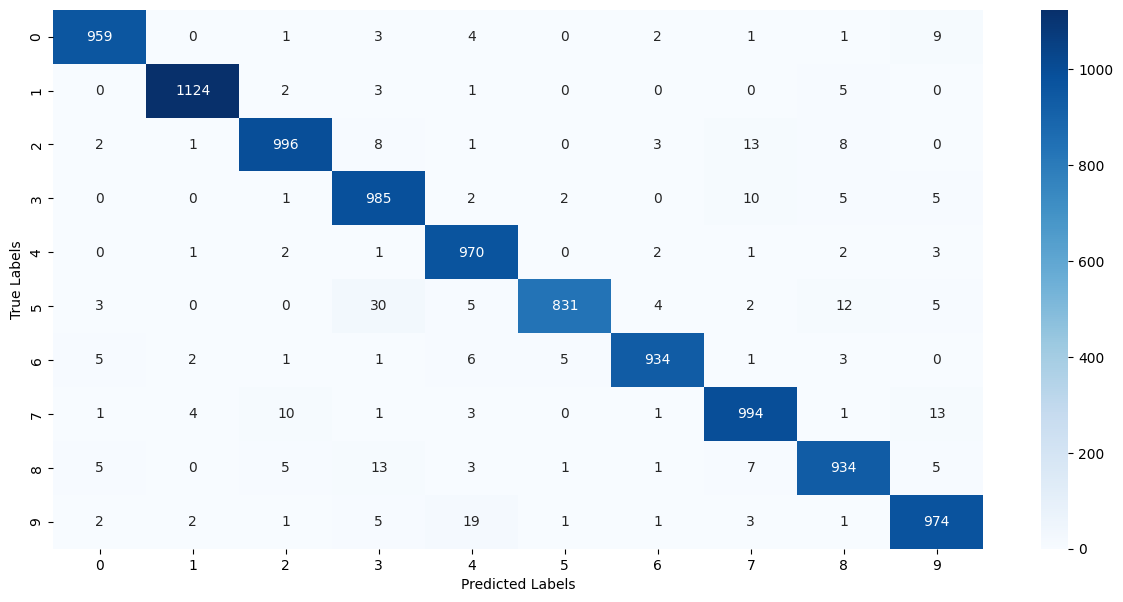

In [50]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') # d means integer
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Predictive System**

In [53]:
input_img_path = '/content/MNIST_digit.png'

input_image = cv2.imread(input_img_path) # converting the image to numpy array

In [54]:
type(input_image)

numpy.ndarray

In [56]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


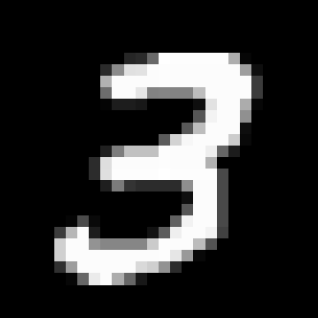

In [57]:
cv2_imshow(input_image)

In [58]:
input_image.shape

(318, 318, 3)

It's RGB image. Convert it to Grayscale

In [63]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [64]:
grayscale.shape

(318, 318)

Resize the image

In [65]:
input_image_resized = cv2.resize(grayscale,(28,28))

In [66]:
input_image_resized.shape

(28, 28)

In [67]:
cv2_imshow(input_image_resized)

In [68]:
input_image_resized = input_image_resized / 255

In [70]:
type(input_image_resized)

numpy.ndarray

In [71]:
image_reshaped = np.reshape(input_image_resized, [1,28,28]) #predicting the value for only 1 image and dimension of this image is 28 x 28

In [72]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[2.0879683e-10 6.0878019e-04 7.6915947e-04 1.0000000e+00 9.3252141e-14
  8.6097003e-07 1.5453189e-22 5.8002122e-02 7.8217685e-02 9.9502498e-01]]


In [73]:
input_pred_label = np.argmax(input_prediction)

In [74]:
print(input_pred_label)

3


Predictive System in one cell

Path of the image to be predicted: /content/MNIST_digit.png


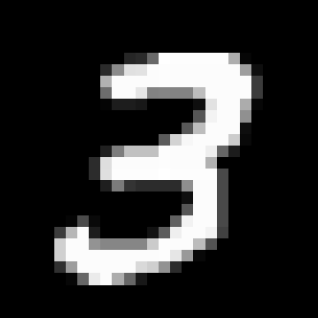

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
The handwritten digit is 3


In [77]:
input_img_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_img_path) # converting the image to numpy array

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(grayscale,(28,28))

input_image_resized = input_image_resized / 255

image_reshaped = np.reshape(input_image_resized, [1,28,28]) # predicting the value for only 1 image not 10 (we say this to the model) and dimension of this image is 28 x 28

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is', input_pred_label)